In [139]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# lets read the csv file
cars = pd.read_csv('true_car_listings.csv')

In [141]:
# lets see the random 5 rows
cars.sample(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
628693,10924,2016,38537,Victorville,CA,JA32U2FU2GU005270,Mitsubishi,LancerES
207623,21731,2016,40738,Hollywood,FL,2C3CDXCT0GH114803,Dodge,ChargerRT
777192,22587,2016,18359,Tulsa,OK,2T3RFREV1GW433508,Toyota,RAV4AWD
196793,16985,2015,50915,Atlanta,GA,2C4RC1BG8FR544565,Chrysler,Town
548309,25987,2017,13427,North Kansas City,MO,KNDMB5C10H6238002,Kia,SedonaLX


In [142]:
# lets get the info about the rows and columns
cars.info()

# Columns
# Price - Target Variable.
# Year - Year of the car purchased.
# Mileage - The no.of kms drove by the car.
# City - In which city it was sold.
# State - In which state it was sold.
# Vin - a unique number for a car.
# Make - Manufacturer of the car.
# Model - The model(name) of the car.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [143]:
# lets check the unique values in year column
cars['Year'].unique()

# there are total 22 unique years

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997],
      dtype=int64)

In [144]:
# lets check the unique values in city column
cars['City'].value_counts()

City
Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: count, Length: 2553, dtype: int64

In [145]:
# lets transform the city column
cars['City'] = cars['City'].apply(lambda x: x.replace(" ", '').lower())

In [146]:
# lets check the unique values of state column
cars['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [147]:
# lets transform the state column
cars['State'] = cars['State'].apply(lambda x: x.lower())
cars.drop(columns=['State', 'City', 'Vin'], inplace= True)

In [148]:
# lets check the models
cars['Model'].value_counts()

Model
Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: count, Length: 2736, dtype: int64

## Dataset Preparation 

In [149]:
# lets see the description of numeric columns
cars.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


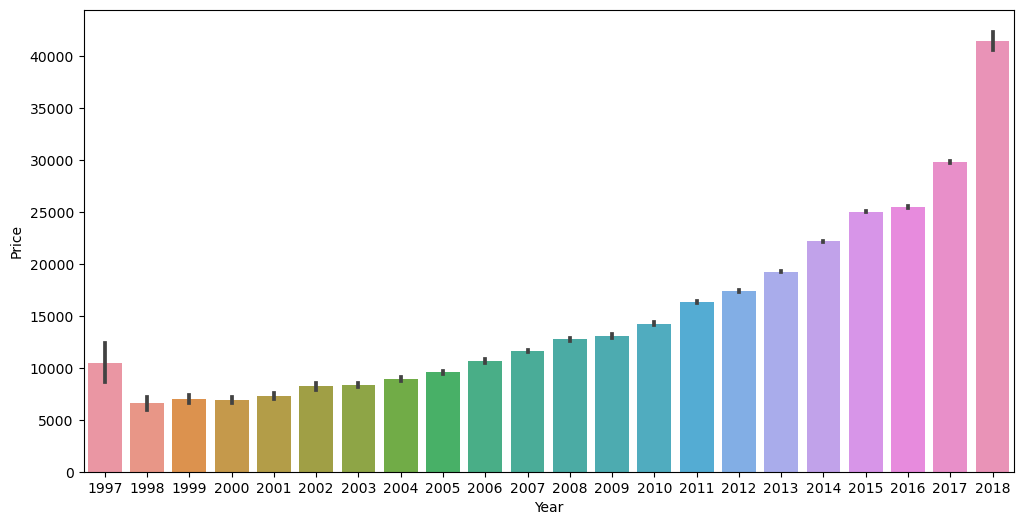

In [150]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Year', y = 'Price', data = cars)
plt.show()

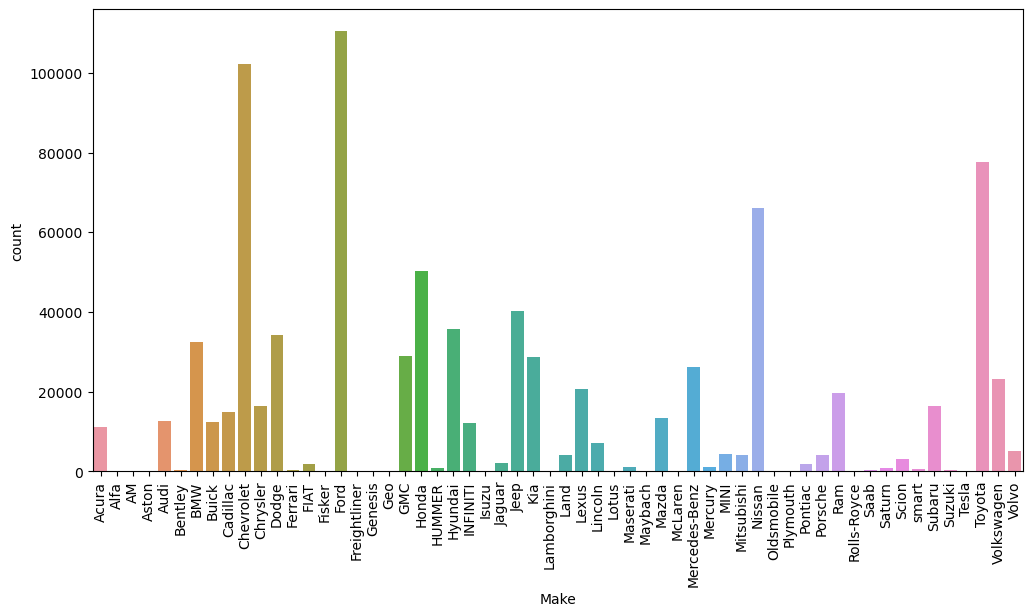

In [151]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Make', data = cars)
plt.xticks(rotation=90)
plt.show()

In [152]:
# lets import some required classes for data transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [153]:
# lets use the Column Transformer
transformed_data = ColumnTransformer(transformers=[('OneHotEncoding', OneHotEncoder(drop='first'), ['Make','Model']),
                               ('MinMaxScaler', MinMaxScaler(), ['Mileage'])], remainder='passthrough')
transformed_data

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['Make', 'Model']),
                                ('MinMaxScaler', MinMaxScaler(), ['Mileage'])])

In [165]:
# lets transform the data of all the columns 
X = transformed_data.fit_transform(cars[['Make', 'Model', 'Mileage', 'Year']])

In [166]:
# lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, cars['Price'], test_size=0.3, random_state= 3, shuffle=True)

## Model Building

In [156]:
# lets import some regressors which we would like to use
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Model Training and Evaluating

In [157]:
# lets define the model
linreg = LinearRegression()

In [167]:
# lets train linear regression model and evaluate
linreg.fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)
r2_score(y_test, y_pred1)

0.862090183165815

## Try out some predictions

In [176]:
# lets define a function which predicts the Life expectancy when a raw data is supplied to it
def predictor(raw_data):
    # raw_data is a dict of list      
    X = transformed_data.transform(pd.DataFrame(raw_data))
    y = np.round(linreg.predict(X), 2)
    for i in y:
        print(f'The cost of the car with brand "{raw_data["Make"][np.where(y == i)[0][0]]}" and model "{raw_data["Model"][np.where(y == i)[0][0]]}" is {i}')


In [178]:
raw_data = {'Make': ['Ford', 'Chevrolet', 'Audi', 'Hyundai', 'Dodge'],
            'Model': ['FocusHatchback', 'EquinoxAWD', 'A42.0T', 'Sonata4dr', 'JourneySXT'],
            'Mileage': [64808, 65430, 41935, 68739, 48202],
            'Year': [2013, 2014, 2015, 2011, 2015]
           }
predictor(raw_data)

The cost of the car with brand "Ford" and model "FocusHatchback" is 8836.72
The cost of the car with brand "Chevrolet" and model "EquinoxAWD" is 17000.13
The cost of the car with brand "Audi" and model "A42.0T" is 23471.82
The cost of the car with brand "Hyundai" and model "Sonata4dr" is 10213.69
The cost of the car with brand "Dodge" and model "JourneySXT" is 15621.72
